In [29]:
from logicqubit.logic import *
from cmath import *
import numpy as np
import sympy as sp
from scipy.linalg import expm, sinm, cosm, logm, sqrtm

In [30]:
def qft(qr):
    for i in range(len(qr)):
        for j in range(i):
            qr[i].CU1(qr[j], pi/float(2**(i-j)))
        qr[i].H()
        
def iqft(qr):
    for i in range(len(qr)):
        for j in range(i):
            qr[i].CU1(qr[j], -pi/float(2**(i-j)))
        qr[i].H()
        
def swap(s1, s2):
    s2.CX(s1)
    s1.CX(s2)
    s2.CX(s1)

In [31]:
A = np.matrix([[3,1],[1,3]]) # *1/2
U = np.matrix(expm(-1j*A))

b = np.array([1,1])
x = np.linalg.solve(U, b)
print(U,x)

[[-0.53489523-0.07624747j -0.11874839+0.83304996j]
 [-0.11874839+0.83304996j -0.53489523-0.07624747j]] [-0.65364362-0.7568025j -0.65364362-0.7568025j]


In [32]:
# Ax=b, x=3/8=0.375 e -1/8=-0.125

A = np.matrix([[3,1],[1,3]]) # *1/2
U = np.matrix(expm(-1j*A))
U_A_div2 = np.matrix(expm(1j*2*pi*A/2)) # t0=2*pi
U_A_div4 = np.matrix(expm(1j*2*pi*A/4))
U_A_div8 = np.matrix(expm(1j*2*pi*A/8))
print(U)

[[-0.53489523-0.07624747j -0.11874839+0.83304996j]
 [-0.11874839+0.83304996j -0.53489523-0.07624747j]]


In [33]:
logicQuBit  = LogicQuBit(7)

m = 2

a = Qubit()
c1 = Qubit()
c2 = Qubit()
c3 = Qubit()
b = Qubit()

c1.H()
c2.H()
c3.H()

#b.X()
b.H()
# phase estimation
b.CU(c3, U_A_div2)
b.CU(c2, U_A_div4)
b.CU(c1, U_A_div8)

iqft([c1,c2,c3])

swap(c3,c2)

a.CRY(c3, 8*pi/2**(m-1))
a.CRY(c2, 4*pi/2**(m-1))
a.CRY(c1, 2*pi/2**(m-1))

swap(c3,c2)

qft([c1,c2,c3])

# reverse phase estimation
b.CU(c3, U_A_div2.conj().T)
b.CU(c2, U_A_div4.conj().T)
b.CU(c1, U_A_div8.conj().T)

c1.H()
c2.H()
c3.H()
#c3.PrintState()

[array(1.01239033e-31-2.20145656e-50j), array(1.-5.81739754e-18j)]


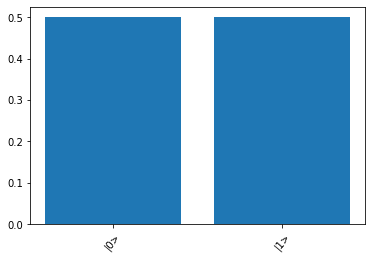

[0.4999999999999989, 0.4999999999999988]


In [26]:
res_a = logicQuBit.Measure_One(a)
print(res_a)
res = logicQuBit.Measure([b]) # x=medir(b)
logicQuBit.Plot()
print(res)

In [27]:
def Text2List(table):
    list = [int(i, base=2) for i in table]
    size = len(table[0])
    tmp = sorted(list, key=int, reverse=False)  # values in ascending order
    result = [[int(bin(j)[2:].zfill(size)[i]) for i in range(size)] for j in tmp]
    return result

def BinList(n):
    blist = []
    for i in iter(range(2 ** n)):
        b = bin(i)[2:].zfill(n)  # value in binary, ex: i=1, n=4 -> '0001'
        blist.append(b)
    return Text2List(blist)

#size=3
#blist = [value for i,value in enumerate(BinList(size)) if res[i]>0.1] 
#results = [sum([value/2**(i+1) for i,value in enumerate(j)]) for j in blist]
#print(results)

In [28]:
# todos possíveis valores
size = 3
blist = [[i >> bl & 0x1 for bl in range(size)][::-1] for i in range(2**size)]
results = [2*pi*sum([value/2**(i+1) for i,value in enumerate(j)]) for j in blist]
results

[0.0,
 0.7853981633974483,
 1.5707963267948966,
 2.356194490192345,
 3.141592653589793,
 3.9269908169872414,
 4.71238898038469,
 5.497787143782138]

In [6]:
h_eigenvalue = np.linalg.eigh(A)
print(h_eigenvalue)

(array([2., 4.]), matrix([[-0.70710678,  0.70710678],
        [ 0.70710678,  0.70710678]]))


In [18]:
a1 = h_eigenvalue[0][0]
a2 = h_eigenvalue[0][1]
v1 = h_eigenvalue[1][0]
v2 = h_eigenvalue[1][1]

In [20]:
# multiplicar lamb^-1 por a_i*v_i
(a1*v1+a2*v2)*0.75

matrix([[1.41421356, 4.24264069]])